# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [ ]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

In [ ]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

In [ ]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

In [ ]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

In [ ]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [ ]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [ ]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

# TASK - 1
## Maintain initial position in the space

In [15]:
# Task 1 : to maintain the initial position - Hover 

from agents.agentDDPG import agentDDPG
from task import Task
import numpy as np


episodes = 500
init_pose = np.array([0., 0., 10., 0., 0., 0.])
target_pos = np.array([0., 0., 10.])
task = Task(task_no=1, init_pose=init_pose, target_pos=target_pos)

agent = agentDDPG(task)

moving_rewards = deque(maxlen=20)
eps_reward_task1 = []
projection = []

for i in range(episodes):
    state = agent.reset_episode()
    total_reward = 0
    episode_projection = []
    episode_projection.append(state[:3])
    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward
        episode_projection.append(next_state[0:3])
        episode_projection.append(next_state[6:9])
        episode_projection.append(next_state[12:15])
        
        if done == True:
            moving_rewards.append(total_reward)
            eps_reward_task1.append([i, np.mean(moving_rewards)])
            projection.append(episode_projection)
            print("Episode: {}/{}".format(i+1, episodes), "Score: {}".format(total_reward), "Moving Avg Reward: {}".format(np.mean(moving_rewards)))
            break

Episode: 1/500 Score: 38.02322630300457 Moving Avg Reward: 38.02322630300457
Episode: 2/500 Score: 36.63446554429068 Moving Avg Reward: 37.32884592364762
Episode: 3/500 Score: 37.66155531367576 Moving Avg Reward: 37.439749053657
Episode: 4/500 Score: 38.71244703395244 Moving Avg Reward: 37.75792354873086
Episode: 5/500 Score: 24.810342223496225 Moving Avg Reward: 35.16840728368393
Episode: 6/500 Score: -102.38849356216569 Moving Avg Reward: 12.242257142708995
Episode: 7/500 Score: -248.96658856373304 Moving Avg Reward: -25.073292243925582
Episode: 8/500 Score: 83.97240852254647 Moving Avg Reward: -11.442579648116574
Episode: 9/500 Score: 82.28738985627471 Moving Avg Reward: -1.0281385920730974
Episode: 10/500 Score: 159.44762729087583 Moving Avg Reward: 15.019437996221797
Episode: 11/500 Score: 197.3902979211631 Moving Avg Reward: 31.59860708030737
Episode: 12/500 Score: -23.102433275086973 Moving Avg Reward: 27.040187050691173
Episode: 13/500 Score: 10.775835337364274 Moving Avg Rewar

Episode: 105/500 Score: 40.95145260240396 Moving Avg Reward: 92.6596291961992
Episode: 106/500 Score: 40.37925972282365 Moving Avg Reward: 100.1386954212201
Episode: 107/500 Score: 145.03067738222742 Moving Avg Reward: 106.47882029614013
Episode: 108/500 Score: 116.30532056687649 Moving Avg Reward: 115.47662161635178
Episode: 109/500 Score: 145.22048207621862 Moving Avg Reward: 116.59201987552565
Episode: 110/500 Score: 155.66040326015053 Moving Avg Reward: 115.78454000296571
Episode: 111/500 Score: 238.75067670957225 Moving Avg Reward: 122.13425196802484
Episode: 112/500 Score: 129.68618510246014 Moving Avg Reward: 124.66102810250602
Episode: 113/500 Score: 111.3469476204875 Moving Avg Reward: 124.30795705243327
Episode: 114/500 Score: 122.14251349926678 Moving Avg Reward: 126.80006540085917
Episode: 115/500 Score: -17.844481223037626 Moving Avg Reward: 120.60851857263705
Episode: 116/500 Score: 84.90574427846421 Moving Avg Reward: 118.7580185919503
Episode: 117/500 Score: 70.18099131

Episode: 208/500 Score: 62.38617396563727 Moving Avg Reward: 38.23546248175099
Episode: 209/500 Score: 65.4774383187822 Moving Avg Reward: 40.186703214606325
Episode: 210/500 Score: 67.99745855853807 Moving Avg Reward: 43.751722103170195
Episode: 211/500 Score: 40.180834149912904 Moving Avg Reward: 43.890847464493426
Episode: 212/500 Score: 40.07169970120958 Moving Avg Reward: 46.54562014759175
Episode: 213/500 Score: 34.33491152562697 Moving Avg Reward: 47.15632091298892
Episode: 214/500 Score: 34.945249214219885 Moving Avg Reward: 46.77638132833254
Episode: 215/500 Score: 74.32441763389126 Moving Avg Reward: 47.32224877099288
Episode: 216/500 Score: 37.141166764550576 Moving Avg Reward: 47.327028826280674
Episode: 217/500 Score: 93.16421405168006 Moving Avg Reward: 50.08798982921964
Episode: 218/500 Score: 45.3742674235303 Moving Avg Reward: 49.89037974293779
Episode: 219/500 Score: 31.282298459980176 Moving Avg Reward: 48.30976458615908
Episode: 220/500 Score: 32.41930906226705 Movi

Episode: 311/500 Score: 114.45152525076679 Moving Avg Reward: 131.50444108862723
Episode: 312/500 Score: 82.08987397849548 Moving Avg Reward: 129.00290549442312
Episode: 313/500 Score: 119.00764818649004 Moving Avg Reward: 127.35460198489993
Episode: 314/500 Score: 60.97601015861158 Moving Avg Reward: 121.56357845540114
Episode: 315/500 Score: 63.62195076615794 Moving Avg Reward: 115.58176561313144
Episode: 316/500 Score: 119.14428714258342 Moving Avg Reward: 111.09036695324876
Episode: 317/500 Score: 126.3128190966376 Moving Avg Reward: 107.45652722933657
Episode: 318/500 Score: 118.44937673512753 Moving Avg Reward: 104.15502315626841
Episode: 319/500 Score: 203.84396270741658 Moving Avg Reward: 106.802777904352
Episode: 320/500 Score: 117.42371994979847 Moving Avg Reward: 105.41806137316766
Episode: 321/500 Score: 112.00801345329788 Moving Avg Reward: 104.22764819082632
Episode: 322/500 Score: 148.89336685205535 Moving Avg Reward: 108.68335210395517
Episode: 323/500 Score: 111.334560

Episode: 413/500 Score: 148.08592255611904 Moving Avg Reward: 147.69416864538763
Episode: 414/500 Score: 111.84234818760727 Moving Avg Reward: 147.73412370422017
Episode: 415/500 Score: 111.43575599598509 Moving Avg Reward: 143.51836441218862
Episode: 416/500 Score: 156.3613592936686 Moving Avg Reward: 145.79053837224038
Episode: 417/500 Score: 110.16451252835203 Moving Avg Reward: 143.84156344621258
Episode: 418/500 Score: 144.32821971202492 Moving Avg Reward: 143.2138266090871
Episode: 419/500 Score: 111.42874266181347 Moving Avg Reward: 143.19803152856878
Episode: 420/500 Score: 185.64102963956353 Moving Avg Reward: 146.90474891936515
Episode: 421/500 Score: 110.23023350417887 Moving Avg Reward: 146.83156951942897
Episode: 422/500 Score: 106.97674451888905 Moving Avg Reward: 144.79242613714436
Episode: 423/500 Score: 118.16364904278947 Moving Avg Reward: 142.89472381102436
Episode: 424/500 Score: 115.60409285895665 Moving Avg Reward: 140.69560173571068
Episode: 425/500 Score: 111.59

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

## Plot the Rewards for Task - 1

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

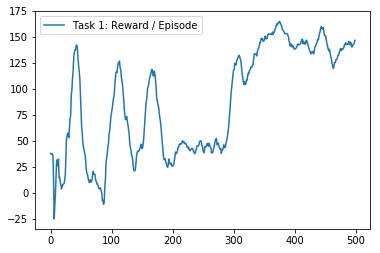

In [17]:
## TODO: Plot the rewards.
episodes_1 = [e[0] for e in eps_reward_task1]
rewards_1 = [e[1] for e in eps_reward_task1]

plt.plot(episodes_1, rewards_1, label='Task 1: Reward / Episode')
plt.legend()
_ = plt.ylim()

X Displacement over time


C:\Users\Meet\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


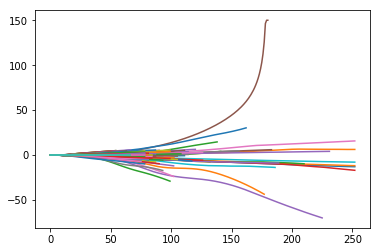

In [18]:
print("X Displacement over time")
for i in range(len(projection)):
    single_episode = projection[i]
    x = [x[0] for x in single_episode]
    
    plt.plot(x)
    plt.legend()
    _ = plt.ylim()

Y Displacement over time


C:\Users\Meet\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


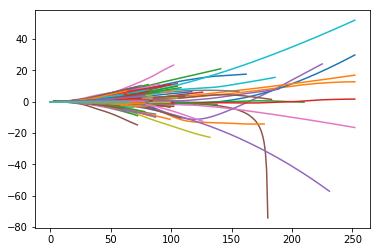

In [19]:
print("Y Displacement over time")
for i in range(len(projection)):
    single_episode = projection[i]
    y = [x[1] for x in single_episode]
    
    plt.plot(y)
    plt.legend()
    _ = plt.ylim()

Z Displacement over time


C:\Users\Meet\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


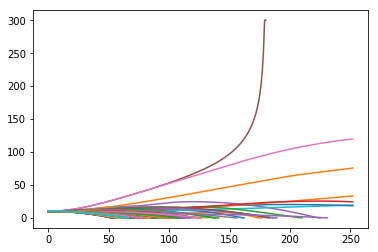

In [20]:
print("Z Displacement over time")
for i in range(len(projection)):
    single_episode = projection[i]
    z = [x[2] for x in single_episode]
    
    plt.plot(z)
    plt.legend()
    _ = plt.ylim()

In [21]:
# Single Episode after training.
import csv

labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results_task1 = {x : [] for x in labels}

# Run the simulation, and save the results.
with open('simulation_results_task1', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    state = agent.reset_episode()
    eps_rewards = 0
    while True:
        rotor_speeds = agent.act(state)
        _, reward, done = task.step(rotor_speeds)
        eps_rewards += reward
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results_task1[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        state = np.concatenate([task.sim.pose] * 3)
        if done:
            print("End of episode. Total Reward: ", eps_rewards)
            break

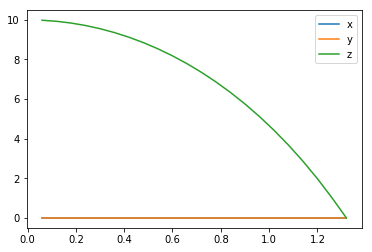

In [22]:
plt.plot(results_task1['time'], results_task1['x'], label='x')
plt.plot(results_task1['time'], results_task1['y'], label='y')
plt.plot(results_task1['time'], results_task1['z'], label='z')
plt.legend()
_ = plt.ylim()

# TASK - 2
## Take off from a given point in space to the specified target point in space

In [23]:
# Task 2 : Take off from init_position of 0, 0, 3 to 0, 0, 10
# Note : Please change the reward function in the task function for the task 2
from agents.agentDDPG import agentDDPG
from task import Task
import numpy as np
from collections import deque

episodes = 500

init_pose = np.array([0., 0., 3., 0., 0., 0.])
target_pos = np.array([0., 0., 10.])
task = Task(task_no=2, init_pose=init_pose, target_pos=target_pos)

agent = agentDDPG(task)
moving_rewards = deque(maxlen=20)
eps_reward_task2 = []
projection_2 = []

for i in range(episodes):
    state = agent.reset_episode()
    total_reward = 0
    episode_projection = []
    episode_projection.append(state[:3])
    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward
        episode_projection.append(next_state[0:3])
        episode_projection.append(next_state[6:9])
        episode_projection.append(next_state[12:15])
        
        if done == True:
            moving_rewards.append(total_reward)
            eps_reward_task2.append([i, np.mean(moving_rewards)])
            projection_2.append(episode_projection)
            print("Episode: {}/{}".format(i+1, episodes), "Score: {}".format(total_reward), "Moving Avg Reward: {}".format(np.mean(moving_rewards)))
            break

Episode: 1/500 Score: 36.92721109324882 Moving Avg Reward: 36.92721109324882
Episode: 2/500 Score: 36.972808733893714 Moving Avg Reward: 36.950009913571265
Episode: 3/500 Score: 38.826283485229304 Moving Avg Reward: 37.57543443745728
Episode: 4/500 Score: 36.8698568832024 Moving Avg Reward: 37.39904004889356
Episode: 5/500 Score: 36.803555942821134 Moving Avg Reward: 37.27994322767908
Episode: 6/500 Score: 33.035550853750706 Moving Avg Reward: 36.57254449869101
Episode: 7/500 Score: 24.58201171183379 Moving Avg Reward: 34.8596112434257
Episode: 8/500 Score: 47.07089939589411 Moving Avg Reward: 36.386022262484246
Episode: 9/500 Score: 54.886700036999066 Moving Avg Reward: 38.441653126319224
Episode: 10/500 Score: 43.756161324876835 Moving Avg Reward: 38.97310394617499
Episode: 11/500 Score: 19.085148474972538 Moving Avg Reward: 37.165107994247485
Episode: 12/500 Score: 15.407586026218418 Moving Avg Reward: 35.3519811635784
Episode: 13/500 Score: 34.222880425247446 Moving Avg Reward: 35.

Episode: 105/500 Score: 62.70366962566689 Moving Avg Reward: 65.38208469665605
Episode: 106/500 Score: 62.73739021595287 Moving Avg Reward: 65.25379146210176
Episode: 107/500 Score: 62.73795618180494 Moving Avg Reward: 65.11674043539834
Episode: 108/500 Score: 62.77863755514703 Moving Avg Reward: 64.99193467412117
Episode: 109/500 Score: 62.79486316739708 Moving Avg Reward: 64.82186895054699
Episode: 110/500 Score: 62.798430737969404 Moving Avg Reward: 64.61344431270632
Episode: 111/500 Score: 62.81869664287989 Moving Avg Reward: 64.38413071304629
Episode: 112/500 Score: 62.825295269564634 Moving Avg Reward: 64.15797506276314
Episode: 113/500 Score: 62.83105525685583 Moving Avg Reward: 63.94890602499625
Episode: 114/500 Score: 62.83614142163673 Moving Avg Reward: 63.73577481138403
Episode: 115/500 Score: 62.83821844964469 Moving Avg Reward: 63.854929003519466
Episode: 116/500 Score: 62.83963671399288 Moving Avg Reward: 63.62636470912069
Episode: 117/500 Score: 62.840683711905285 Moving

Episode: 209/500 Score: 62.84886335897791 Moving Avg Reward: 62.84886875079506
Episode: 210/500 Score: 62.8488770945289 Moving Avg Reward: 62.848868824483226
Episode: 211/500 Score: 62.848876340115766 Moving Avg Reward: 62.84886882487581
Episode: 212/500 Score: 62.84887784149501 Moving Avg Reward: 62.8488689124714
Episode: 213/500 Score: 62.84887777131192 Moving Avg Reward: 62.8488761261108
Episode: 214/500 Score: 62.84887422136698 Moving Avg Reward: 62.84887606764877
Episode: 215/500 Score: 62.848877951401505 Moving Avg Reward: 62.848876128306415
Episode: 216/500 Score: 62.84887263089801 Moving Avg Reward: 62.84887592858628
Episode: 217/500 Score: 62.84887523221952 Moving Avg Reward: 62.84887604153263
Episode: 218/500 Score: 62.848877909772575 Moving Avg Reward: 62.84887610537446
Episode: 219/500 Score: 62.848875669623425 Moving Avg Reward: 62.84887603055815
Episode: 220/500 Score: 62.84887514847826 Moving Avg Reward: 62.84887590096432
Episode: 221/500 Score: 62.84887585916848 Moving 

Episode: 313/500 Score: 28.326325424986635 Moving Avg Reward: 64.93086237365938
Episode: 314/500 Score: 28.009157888620802 Moving Avg Reward: 63.190136707762306
Episode: 315/500 Score: 72.33988099122419 Moving Avg Reward: 63.66564248566091
Episode: 316/500 Score: 73.1723776892355 Moving Avg Reward: 64.18228041315079
Episode: 317/500 Score: 28.41602868154992 Moving Avg Reward: 62.46116255930101
Episode: 318/500 Score: 30.96068857406433 Moving Avg Reward: 60.867465269520984
Episode: 319/500 Score: 77.52025643927234 Moving Avg Reward: 61.60189117790179
Episode: 320/500 Score: 73.32073499052294 Moving Avg Reward: 62.13210039318834
Episode: 321/500 Score: 29.769678409123635 Moving Avg Reward: 60.2985406879591
Episode: 322/500 Score: 37.991327425501005 Moving Avg Reward: 58.836965162618945
Episode: 323/500 Score: 62.07674944643834 Moving Avg Reward: 58.70307705286751
Episode: 324/500 Score: 55.74768582837914 Moving Avg Reward: 57.678368526642444
Episode: 325/500 Score: 67.05340839189711 Movi

Episode: 415/500 Score: -155.63536883920995 Moving Avg Reward: 0.9622738369760739
Episode: 416/500 Score: 18.47506900548964 Moving Avg Reward: 0.5631677176227369
Episode: 417/500 Score: -29.655643134750566 Moving Avg Reward: -2.2464687346713537
Episode: 418/500 Score: 24.00663372014285 Moving Avg Reward: -2.3736934714956517
Episode: 419/500 Score: -23.40631701009788 Moving Avg Reward: -4.863621146469175
Episode: 420/500 Score: -25.609242427843515 Moving Avg Reward: -7.467719486203558
Episode: 421/500 Score: -42.36472043862067 Moving Avg Reward: -10.909801409219488
Episode: 422/500 Score: 22.464431414931084 Moving Avg Reward: -11.107495863239459
Episode: 423/500 Score: 6.1734720163107495 Moving Avg Reward: -12.115748257150763
Episode: 424/500 Score: 22.331985638083918 Moving Avg Reward: -12.319957091773595
Episode: 425/500 Score: 26.02203563042437 Moving Avg Reward: -12.347277625729857
Episode: 426/500 Score: 26.499724108090213 Moving Avg Reward: -10.883428503346
Episode: 427/500 Score:

## Plot the Rewards for Task - 2

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

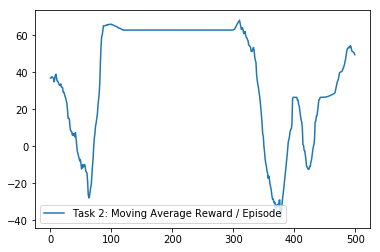

In [29]:
## TODO: Plot the rewards.
episodes_2 = [e[0] for e in eps_reward_task2]
rewards_2 = [e[1] for e in eps_reward_task2]

plt.plot(episodes_2, rewards_2, label='Task 2: Moving Average Reward / Episode')
plt.legend()
_ = plt.ylim()

X Displacement over time


C:\Users\Meet\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


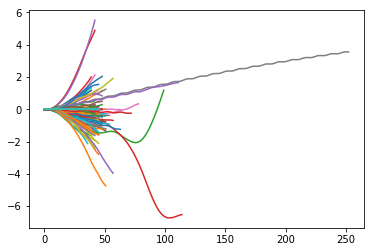

In [24]:
print("X Displacement over time")
for i in range(len(projection_2)):
    single_episode = projection_2[i]
    x = [x[0] for x in single_episode]
    
    plt.plot(x)
    plt.legend()
    _ = plt.ylim()

Y Displacement over time


C:\Users\Meet\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


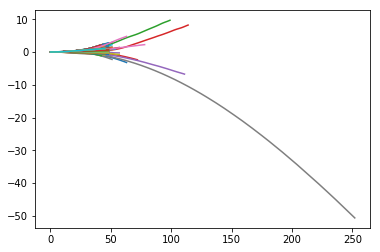

In [25]:
print("Y Displacement over time")
for i in range(len(projection_2)):
    single_episode = projection_2[i]
    y = [x[1] for x in single_episode]
    
    plt.plot(y)
    plt.legend()
    _ = plt.ylim()

Z Displacement over time


C:\Users\Meet\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


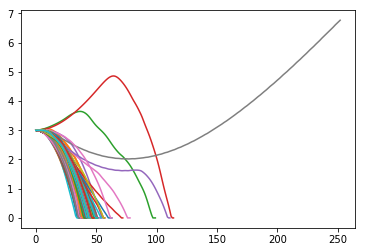

In [26]:
print("Z Displacement over time")
for i in range(len(projection_2)):
    single_episode = projection_2[i]
    z = [x[2] for x in single_episode]
    
    plt.plot(z)
    plt.legend()
    _ = plt.ylim()

In [27]:
import csv

labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results_task2 = {x : [] for x in labels}
done=False

# Run the simulation, and save the results.
with open('simulation_results_task2', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    eps_rewards = 0
    state = agent.reset_episode()
    while True:
        rotor_speeds = agent.act(state)
        _, reward, done = task.step(rotor_speeds)
        eps_rewards += reward
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results_task2[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        state = np.concatenate([task.sim.pose] * 3)
        if done:
            print("End of episode. Total Reward: ", eps_rewards)
            break

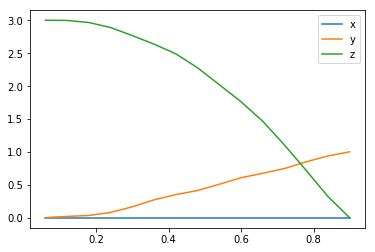

In [28]:
plt.plot(results_task2['time'], results_task2['x'], label='x')
plt.plot(results_task2['time'], results_task2['y'], label='y')
plt.plot(results_task2['time'], results_task2['z'], label='z')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: 

Actually there are no hard coded task inside 'task.py'. Here, there are two tasks implemented. One is to start from a given position and try to hold the position. Other task is to move up in Z-dir from a given position to target position.

For both these, individual reward functions have been created and used by setting the parameter self.task_no_ to 1 or 2 for task 1 and task 2 respectively.

For Task-1 (Holding the position), the absolute difference between individual axis for target position and current position is used as a measure. The higher the value the higher the agent will be penalize by -ve value. X and Y absolute difference has been multiplied by 2 to give extra importance to it. Also, to prevent sudden movement of the quadcopter the velocity of Z-dir has been used to penalize high velocity actions.

For Task-2 (Task off from point A to point B), similar to Task-1 here also the absolute differences are used. The z_s will be equal to 1 when the absolute difference in Z parameters will be zero when Quadcopter reaches target. When it is away the value of z_s will be less that 1. In addition to that, the positive velocity in Z dir has been rewarded while in -ve dir it is penalized. Similarly the sudden velocity increase for X and Y axis from a given threshold will fetch penalties (-ve rewards) to restrict the Quadcopter in XY plane.


**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

Initially, I tried my hand on the raw Actor Critic Method from the scratch using only tensorflow instead of Keras. I took help from this : https://github.com/MorvanZhou/Reinforcement-learning-with-tensorflow/blob/master/contents/8_Actor_Critic_Advantage/AC_CartPole.py . But I got lots of issues during trobleshooting my implementation of the algorithm. 

Then I started implementing DDPG algorithm with the guide provided with the project module. It helped alot to understand. 

Gamma = 0.99,
Tau = 0.01,
Learning rate = 0.001 for both actor and critic with Adam optimizer

**Neural Network for Actor**:

Input (18 states) --> hidden layer-1 (64 neurons) --> Batch Normalization --> Relu --> Dropout(0.3) --> hidden layer-2 (32 neurons) --> Batch Normalization --> Relu --> Dropout(0.3) --> output (4 actions) --> Sigmoid (to scale between 0 to 1)

**Neural Network for Critic**:

State_Input (18 states) --> state hidden layer-1 (32 neurons) --> Batch Normalization --> Relu --> Dropout(0.2) --> state hidden layer-2 (32 neurons) --> Batch Normalization --> Relu --> Dropout(0.3) --> State_representation

Action_Input (4 states) --> action hidden layer-1 (32 neurons) --> Batch Normalization --> Relu --> Dropout(0.4) --> action hidden layer-2 (32 neurons) --> Batch Normalization --> Relu --> Dropout(0.4) --> Action_representation

hidden_layer_2 = combine (State_representation, Action_representation)

hidden_layer_2 (32 neurons) --> Relu --> hidden_layer_2 (64 neurons) --> Batch Normalization --> Relu --> Dropout(0.3) --> output (1 Q_value)

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

It was a hard task to learn as there are multiple things depend on training. During training, we feed the network with some random experiences out of which our neural network will generalize. From the data feed to the network there are high chances that the good experiences are less in quantity as compared to bad experiences as these experiences are totally made from random neural network. Also, the input the network has not been normalized which further be treated differently.

The learning in Task-1 was kind of gradual while in Task-2 there was sudden rise in the performance. We want such performance continuously. These good performances will show that the agent is getting good rewards and is acting as per our criteria. But after some episodes, may be agent had been feed with bad examples and it had been trained that way. That had felled the moving average rewards over last 20 episodes.

The overall performance of agent for both the tasks was not upto the mark. It barely gets to fulfil the objective that too in one or two episodes only.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

The hardest part was to getting started because for the last few methods that have been taught, Actor-Critic Method had not been practiced by us and more over there was no rigid explanation for DDPG method except for the project module codes. That had made huge gap which was filled by searching all around the web to get better understanding of both these method. Also understanding the environment was another challenge as till now we have worked in OpenAI Gym environment and now we need to use some other environment. So it took lot of time to understand what is going on.

The intersting thing is that the agent that has been learning based on random samples which are stored in memory is biased. There are very few samples which are good for our objective / task. And based on the memory samples the agent had trained. There were many observations when the agent suddenly totally forgets the way of working and fetchs very less rewards just because of bad examples.